In [1]:
import sys
!{sys.executable} -m pip install yfinance

In [2]:
import yfinance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

print("All libraries working!")

All libraries working!


In [4]:
from scipy.stats import norm

In [5]:
# Define the variables
S = 42 # Underlying Price
K = 40 # Strike Price
T = 0.5 # Time to Expiration
r =  0.1 # Risk-Free Rate 
vol = 0.2 # Volatility 

In [6]:
d1 = (np.log(S/K) + (r+0.5*vol**2) *T ) / (vol * np.sqrt(T))

In [7]:
d2 = d1 - (vol * np.sqrt(T))

In [8]:
C =  S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

In [9]:
P = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

In [10]:
print(' The value of d1 is: ', round(d1,4))
print(' The value of d2 is: ', round(d2,4))
print(' The price of the call option is:$', round(C,4))
print(' The price of the put option is:$', round(P,4))

 The value of d1 is:  0.7693
 The value of d2 is:  0.6278
 The price of the call option is:$ 4.7594
 The price of the put option is:$ 0.8086


In [11]:
# BLack Scholes Option Pricing Model using real values

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import brentq

In [13]:
ticker = "AAPL"
data = yf.download(ticker, period="1y")

[*********************100%***********************]  1 of 1 completed


In [14]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-02-07,226.605133,232.946448,226.236789,231.552758,39707200
2025-02-10,226.874191,229.804175,226.425728,228.787662,33115600
2025-02-11,231.827255,234.428361,227.352566,227.422320,53718400
2025-02-12,236.062775,236.152480,229.893867,230.412099,45243300
2025-02-13,240.706894,241.514131,234.767213,236.102643,53614100


In [15]:
S = data['Close'].iloc[-1]
print("Current stock price:", S)

Current stock price: Ticker
AAPL    278.119995
Name: 2026-02-06 00:00:00, dtype: float64


In [16]:
returns = np.log(data['Close'] / data['Close'].shift(1))
returns = returns.dropna()

vol = returns.std() * np.sqrt(252)
print("Annualized volatility:", vol)

Annualized volatility: Ticker
AAPL    0.315641
dtype: float64


In [17]:
K = round(S)          # At-the-money strike
T = 0.25              # 3 months to maturity
r = 0.05              # 5% risk-free rate

In [18]:
d1 = (np.log(S/K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

In [19]:
call_price = S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
put_price = K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

print("Call Price:", call_price)
print("Put Price:", put_price)

Call Price: Ticker
AAPL    19.225115
Name: 2026-02-06 00:00:00, dtype: float64
Put Price: Ticker
AAPL    15.651748
Name: 2026-02-06 00:00:00, dtype: float64


In [20]:
# Call greeks 

In [21]:
delta_call = norm.cdf(d1)
gamma = norm.pdf(d1) / (S * vol * np.sqrt(T))
vega = S * norm.pdf(d1) * np.sqrt(T)
theta_call = -(S * norm.pdf(d1) * vol) / (2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2)
             
rho_call = K * T * np.exp(-r*T) * norm.cdf(d2)

In [22]:
print(" Call Greeks:")
print("Delta:", delta_call)
print("Gamma:", gamma)
print("Vega :", vega)
print("Theta:", theta_call)
print("Rho  :", rho_call)

 Call Greeks:
Delta: [0.56389366]
Gamma: Ticker
AAPL    0.008972
dtype: float64
Vega : Ticker
AAPL    54.763878
Name: 2026-02-06 00:00:00, dtype: float64
Theta: Ticker
AAPL   -41.451668
dtype: float64
Rho  : Ticker
AAPL    34.401247
Name: 2026-02-06 00:00:00, dtype: float64


In [23]:
# Put Greeks derived from Call Greeks (Put–Call Parity)

In [24]:
delta_put = delta_call - 1
gamma_put = gamma
vega_put = vega
theta_put = theta_call + r * K * np.exp(-r * T)
rho_put = rho_call - K * T * np.exp(-r * T)

In [25]:
print("Put Greeks:")
print("Delta:", delta_put)
print("Gamma:", gamma_put)
print("Vega :", vega_put)
print("Theta:", theta_put)
print("Rho  :", rho_put)

Put Greeks:
Delta: [-0.43610634]
Gamma: Ticker
AAPL    0.008972
dtype: float64
Vega : Ticker
AAPL    54.763878
Name: 2026-02-06 00:00:00, dtype: float64
Theta: Ticker
AAPL   -27.724337
dtype: float64
Rho  : Ticker
AAPL   -34.23541
Name: 2026-02-06 00:00:00, dtype: float64


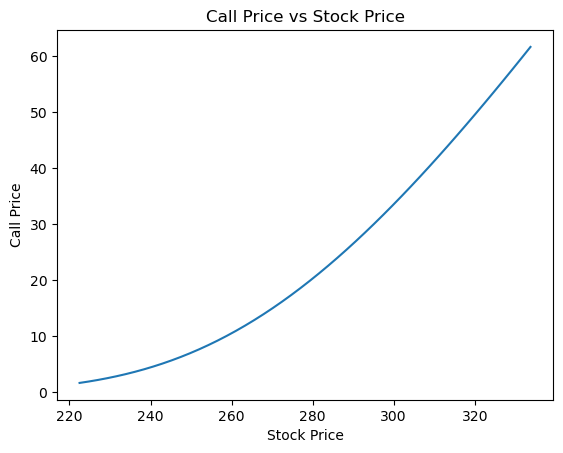

In [26]:
stock_range = np.linspace(0.8*S, 1.2*S, 50)

call_prices = []
for s in stock_range:
    d1 = (np.log(s/K) + (r + 0.5 * vol**2)*T)/(vol*np.sqrt(T))
    d2 = d1 - vol*np.sqrt(T)
    call_prices.append(s*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2))

plt.plot(stock_range, call_prices)
plt.xlabel("Stock Price")
plt.ylabel("Call Price")
plt.title("Call Price vs Stock Price")
plt.show()

In [27]:
# Implied Volatility and Caliberation Visualisation

In [28]:
print(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [29]:
S = data['Close'].iloc[-1, 0]

In [30]:
print("Stock price S:", S)
print("Type:", type(S))

Stock price S: 278.1199951171875
Type: <class 'numpy.float64'>


In [31]:
S = data['Close'].iloc[-1, 0]   
print("S:", S, type(S))

S: 278.1199951171875 <class 'numpy.float64'>


In [32]:
K = float(round(S))     # ATM strike
T = float(0.25)         # 3 months
r = float(0.05)         # 5% risk-free rate

In [33]:
market_call_price = call_price.iloc[0]

In [34]:
# Use model-generated price as proxy market price (for calibration validation)
market_call_price = call_price.iloc[0]

print("Market call price:", market_call_price)
print("Type:", type(market_call_price))

Market call price: 19.225114518063236
Type: <class 'numpy.float64'>


In [35]:
from scipy.stats import norm
import numpy as np

In [36]:
def bs_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

In [37]:
from scipy.optimize import brentq

In [38]:
def implied_vol_call(market_price, S, K, T, r):
    return brentq(lambda sigma: bs_call_price(S, K, T, r, sigma) - market_price, 0.001, 2.0)
IV = implied_vol_call(market_call_price, S, K, T, r)
print("Implied Volatility:", round(IV, 4))

Implied Volatility: 0.3156


In [39]:
import matplotlib.pyplot as plt

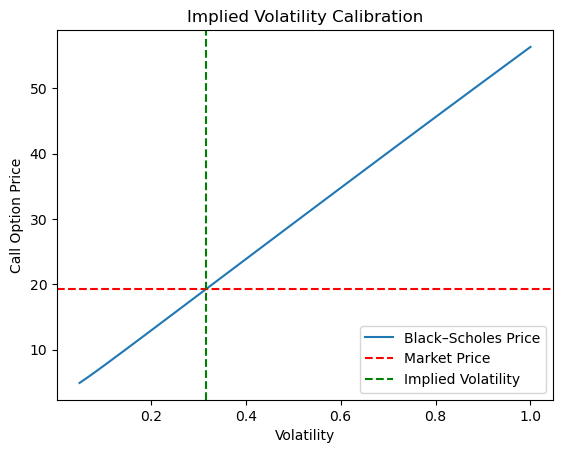

In [40]:
vol_range = np.linspace(0.05, 1.0, 50)
prices_vs_vol = [bs_call_price(S, K, T, r, v) for v in vol_range]

plt.plot(vol_range, prices_vs_vol, label="Black–Scholes Price")
plt.axhline(market_call_price, color='red', linestyle='--', label="Market Price")
plt.axvline(IV, color='green', linestyle='--', label="Implied Volatility")

plt.xlabel("Volatility")
plt.ylabel("Call Option Price")
plt.title("Implied Volatility Calibration")
plt.legend()
plt.show()